# Choosing a classification algorithm

The five main steps that are involved in training the machine learning algorithm can be summaized as follows.

1) Selecting features and collecting training samples. <br>
2) Choosing a performance metric. <br> 
3) Choosing a classifier and optimazation algorithm.<br>
4) Evaluating the performance model.<br>
5) Tuning the algorithm.<br>

# Perceptron

In this section we will use **Iris dataset** that is already available via **scikit-learn**

In [104]:
# Loading all the required libraries
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Loading the dataset 
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [85]:
# Extracting the data and columns to make the dataframe 
df = pd.DataFrame(iris.data, columns= iris.feature_names,index=None)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
# Now we will select the petal lenght and petal width and assign to the feature matrix X and class labels of the 
# flower species to the y
X = iris.data[:,[2,3]]
y = iris.target

In [87]:
print('Class labels:' , np.unique(y))

Class labels: [0 1 2]


Here 0 represents iris-setosa , 1 represents iris-versicolor and 2 represents iris-virginica

## Spliting the dataset 

In [88]:
# Here we randomly split the X and y arrays into test and traing sample and we will use train-test-split function
#from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify = y)
# We radomly split the X and y arrays into 30 percent test data and 70 percent training data

Random state parameter is the random seed value. Random state ensures that results are reproducible.<br>
Stratify ensures that the train test split returns training and test subsets that have same proportions of class labels as the input dataset


In [89]:
# bincount counts the number of occurrences 
print('Label counts in y :', np.bincount(y))

Label counts in y : [50 50 50]


In [90]:
print('Label counts in y_train:' , np.bincount(y_train))

Label counts in y_train: [35 35 35]


In [91]:
print('Label counts in y_test' , np.bincount(y_test))

Label counts in y_test [15 15 15]


## Standardzie the features 

In this section we will standardize the features using the **StandardScaler** from sk-learn.

In [92]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train the perceptron Model 


In [93]:
ppn = Perceptron(max_iter=100 , eta0=0.1, random_state=1)
ppn.fit(X_train_std,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

eta is the learning rate.<br>
max_iter is the parameter that defines the number of epochs (passes over the training set)

### Eta

Things to keep in mind about the learning rate <br>
1) If the learning rate is too large the algorithm will overshoot the global cost minimum.<br>
2) If the learning rate is too small the algorithm requires more epochs until convergence which results in slow learning

### Predictions


In [94]:
y_pred = ppn.predict(X_test_std)

In [95]:
print("Misclassified samples: " , (y_test != y_pred).sum())

Misclassified samples:  3


## Performance Metrics 

In [96]:
# Print accuracy computed from predictions on the test set
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.93


**y_test** is the true label and **y_pred** is the class labels that we predicted

In [97]:
# Print accuracy computed from predictions on the test set
print('Accuracy: ' , ppn.score(X_test_std, y_test))

Accuracy:  0.9333333333333333


## Ploting Decison regions using MLXTEND package

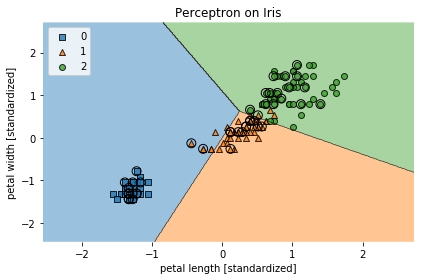

In [107]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,clf=ppn,X_highlight=X_test_std)
plt.title('Perceptron on Iris')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()#plt.savefig('images/03_01.png', dpi=300)plt.show()